### Setup 

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Statistical Tests
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import norm

np.set_printoptions(suppress=True)


# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime

pd.options.display.float_format = '{:20,.2f}'.format



In [2]:
import env

import wrangle

from wrangle import clean_zillow, missing_zero_values_table, features_missing, handle_missing_values, get_zillow_data, split, seperate_y, scale_data, split_seperate_scale 

import explore

### Acquisition 

In [3]:
df = pd.read_csv('zillowcluster_df.csv') 

In [4]:
df.head()

,Unnamed: 0,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,0,nan,nan,2.00,nan,nan,nan,10711855,1087254,nan,...,nan,"60,371,132,321,007.00",-0.01,2017-07-07,NaN,NaN,NaN,Central,NaN,NaN
1,1,nan,nan,2.00,nan,nan,1.00,10711877,1072280,nan,...,nan,"60,371,132,321,007.00",0.02,2017-08-29,Central,NaN,NaN,Central,NaN,NaN
2,2,nan,nan,2.00,nan,nan,1.00,10711888,1340933,nan,...,nan,"60,371,132,321,007.00",0.08,2017-04-04,Central,NaN,NaN,Central,NaN,NaN
3,3,nan,nan,2.00,nan,nan,nan,10711910,1878109,nan,...,nan,"60,371,132,321,008.00",-0.04,2017-03-17,NaN,NaN,NaN,Central,NaN,NaN
4,4,nan,nan,2.00,nan,nan,nan,10711923,2190858,nan,...,nan,"60,371,132,321,008.00",-0.01,2017-03-24,NaN,NaN,NaN,Central,NaN,NaN


In [5]:
df.shape

(77413, 68)

In [113]:
df['has_amenities'] = np.where((df['fireplaceflag']==1) | (df['poolcnt']==1), 1, 0)

In [114]:
clean_df = clean_zillow(df)

In [115]:
clean_df.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,has_amenities,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.00,5.00,2.00,3.00,"2,107.00",6037,34.22,-118.62,"9,158.00",1.00,...,0.00,1.23,0.21,0.30,0.50,1,0.67,1,0,0
10711877,2.00,1.00,2.00,4.00,"1,882.00",6037,34.22,-118.62,"9,035.00",1.00,...,0.00,1.23,0.21,0.30,0.40,1,0.50,1,0,0
10711888,2.00,1.00,2.00,4.00,"1,882.00",6037,34.22,-118.62,"9,800.00",0.00,...,0.00,1.23,0.22,0.30,0.40,0,0.50,1,0,0
10711910,2.00,5.00,2.00,3.00,"1,477.00",6037,34.22,-118.62,"11,285.00",1.00,...,0.00,1.43,0.26,0.30,0.30,1,0.67,1,0,0
10711923,2.00,5.00,2.00,4.00,"1,918.00",6037,34.22,-118.62,"11,239.00",1.00,...,0.00,1.26,0.26,0.30,0.40,1,0.50,1,0,0


In [116]:
clean_df.shape

(58201, 31)

In [117]:
train, validate, test = split(clean_df)

In [118]:
train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,has_amenities,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
12802731,2.00,1.00,1.00,3.00,"1,156.00",6037,33.98,-118.06,"5,471.00",0.00,...,0.00,1.26,0.13,0.10,0.20,0,0.33,1,0,0
12430348,7.00,5.00,1.00,2.00,998.00,6037,33.84,-118.11,"5,131.00",0.00,...,0.00,1.25,0.12,0.10,0.10,0,0.50,1,0,0
12861801,2.00,1.00,3.00,4.00,"2,488.00",6037,33.98,-117.95,"21,778.00",0.00,...,0.00,1.27,0.50,0.30,0.50,0,0.75,1,0,0
11730295,1.00,5.00,3.00,6.00,"2,176.00",6037,34.03,-118.30,"7,184.00",0.00,...,0.00,1.23,0.16,0.20,0.50,0,0.50,1,0,0
12962129,2.00,1.00,3.00,3.00,"1,942.00",6037,34.12,-118.00,"8,662.00",0.00,...,0.00,1.17,0.20,0.20,0.40,0,1.00,1,0,0


In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32592 entries, 12802731 to 17060185
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   heatingorsystemtypeid         32592 non-null  float64       
 1   airconditioningtypeid         32592 non-null  float64       
 2   bathroomcnt                   32592 non-null  float64       
 3   bedroomcnt                    32592 non-null  float64       
 4   calculatedfinishedsquarefeet  32592 non-null  float64       
 5   fips                          32592 non-null  object        
 6   latitude                      32592 non-null  float64       
 7   longitude                     32592 non-null  float64       
 8   lotsizesquarefeet             32592 non-null  float64       
 9   poolcnt                       32592 non-null  float64       
 10  roomcnt                       32592 non-null  float64       
 11  yearbuilt         

In [120]:
train.describe()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,has_amenities,bath_bed_ratio,la_county,orange_county,ventura_county
count,"32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00",...,"32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00"
mean,2.99,4.21,2.16,3.02,"1,641.42",33.99,-118.18,"8,028.41",0.16,1.72,...,0.00,1.28,0.18,0.17,0.34,0.16,0.75,0.60,0.31,0.09
std,3.39,2.22,0.75,0.92,619.27,0.27,0.37,"5,132.37",0.37,2.93,...,0.00,0.23,0.12,0.10,0.17,0.37,0.27,0.49,0.46,0.29
min,1.00,1.00,1.00,1.00,360.00,33.34,-119.45,435.00,0.00,0.00,...,0.00,0.24,0.01,0.00,0.00,0.00,0.20,0.00,0.00,0.00
25%,1.00,5.00,2.00,2.00,"1,187.75",33.79,-118.39,"5,672.00",0.00,0.00,...,0.00,1.16,0.13,0.10,0.20,0.00,0.50,0.00,0.00,0.00
50%,2.00,5.00,2.00,3.00,"1,515.00",33.99,-118.13,"7,200.00",0.00,0.00,...,0.00,1.23,0.17,0.20,0.40,0.00,0.67,1.00,0.00,0.00
75%,2.00,5.00,3.00,4.00,"1,989.00",34.17,-117.90,"8,100.00",0.00,4.00,...,0.00,1.34,0.19,0.20,0.40,0.00,1.00,1.00,1.00,0.00
max,24.00,13.00,7.50,9.00,"3,499.00",34.72,-117.55,"36,805.00",1.00,12.00,...,0.01,2.30,0.84,0.40,0.70,1.00,7.50,1.00,1.00,1.00


In [121]:
train.shape

(32592, 31)

In [122]:
validate.shape

(13968, 31)

In [123]:
test.shape

(11641, 31)

In [124]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [125]:
train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,has_amenities,la_county,orange_county,ventura_county
0,0.04,0.00,0.00,0.25,0.25,0.46,0.73,0.14,0.00,0.00,...,0.57,0.07,0.49,0.14,0.25,0.29,0.00,1.00,0.00,0.00
1,0.26,0.33,0.00,0.12,0.20,0.36,0.71,0.13,0.00,0.00,...,0.57,0.08,0.49,0.13,0.25,0.14,0.00,1.00,0.00,0.00
2,0.04,0.00,0.31,0.38,0.68,0.46,0.79,0.59,0.00,0.00,...,0.36,0.10,0.50,0.59,0.75,0.71,0.00,1.00,0.00,0.00
3,0.00,0.33,0.31,0.62,0.58,0.50,0.60,0.19,0.00,0.00,...,0.71,0.11,0.48,0.18,0.50,0.71,0.00,1.00,0.00,0.00
4,0.04,0.00,0.31,0.25,0.50,0.57,0.76,0.23,0.00,0.00,...,0.57,0.13,0.45,0.23,0.50,0.57,0.00,1.00,0.00,0.00


In [126]:
train_scaled.describe()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,has_amenities,la_county,orange_county,ventura_county
count,"32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00",...,"32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00","32,592.00"
mean,0.09,0.27,0.18,0.25,0.41,0.47,0.67,0.21,0.16,0.14,...,0.41,0.11,0.51,0.21,0.42,0.49,0.16,0.60,0.31,0.09
std,0.15,0.18,0.12,0.11,0.20,0.19,0.20,0.14,0.37,0.24,...,0.16,0.03,0.11,0.14,0.25,0.24,0.37,0.49,0.46,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.33,0.15,0.12,0.26,0.33,0.56,0.14,0.00,0.00,...,0.29,0.09,0.44,0.14,0.25,0.29,0.00,0.00,0.00,0.00
50%,0.04,0.33,0.15,0.25,0.37,0.47,0.69,0.19,0.00,0.00,...,0.43,0.11,0.48,0.19,0.50,0.57,0.00,1.00,0.00,0.00
75%,0.04,0.33,0.31,0.38,0.52,0.60,0.82,0.21,0.00,0.33,...,0.50,0.13,0.53,0.22,0.50,0.57,0.00,1.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Modeling

In [19]:
## latitude

## sq footage
### calculatedsquarefeet

## age of home 

## tax rate 

### different model for each county?

In [20]:
list(train_scaled.columns)

['heatingorsystemtypeid',
 'airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'roomcnt',
 'fireplaceflag',
 'taxvaluedollarcnt',
 'taxamount',
 'logerror',
 'age_of_home',
 'age_bin',
 'baths_per_sqft',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'la_county',
 'orange_county',
 'ventura_county']

In [21]:
X = train_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [127]:
X_validate = validate_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [128]:
X_test = test_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [22]:
X.head()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
0,0.46,0.25,0.50,0.49
1,0.36,0.20,0.50,0.49
2,0.46,0.68,0.30,0.50
3,0.50,0.58,0.72,0.48
4,0.57,0.50,0.52,0.45


In [23]:
X.corr()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
latitude,1.00,0.06,0.04,0.33
calculatedfinishedsquarefeet,0.06,1.00,-0.29,-0.07
age_of_home,0.04,-0.29,1.00,0.07
taxrate,0.33,-0.07,0.07,1.00


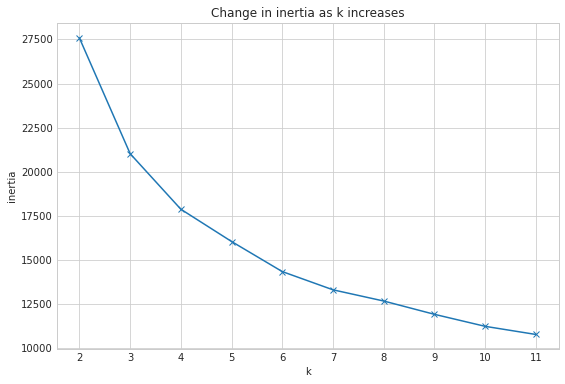

In [24]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [25]:
## it looks like the most appropriate k would be 4

In [26]:
kmeans = KMeans(n_clusters=4)
## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)
## fit the model to the fields you want to use in your model

kmeans.predict(X)
kmeans.predict(X_validate)
kmeans.predict(X_test)
## make your predictions

train_scaled['cluster'] = kmeans.predict(X)
validate_scaled['cluster'] = kmeans.predict(X_validate)
test_scaled['cluster'] = kmeans.predict(X_)
## store the predictions as a column on your df

train['cluster'] = kmeans.predict(X)
validate['cluster'] = kmeans.predict(X_validate)
train['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

In [27]:
train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster
0,0.04,0.00,0.00,0.25,0.25,0.46,0.73,0.14,0.00,0.00,...,0.57,0.07,0.49,0.14,0.25,0.29,1.00,0.00,0.00,3
1,0.26,0.33,0.00,0.12,0.20,0.36,0.71,0.13,0.00,0.00,...,0.57,0.08,0.49,0.13,0.25,0.14,1.00,0.00,0.00,3
2,0.04,0.00,0.31,0.38,0.68,0.46,0.79,0.59,0.00,0.00,...,0.36,0.10,0.50,0.59,0.75,0.71,1.00,0.00,0.00,1
3,0.00,0.33,0.31,0.62,0.58,0.50,0.60,0.19,0.00,0.00,...,0.71,0.11,0.48,0.18,0.50,0.71,1.00,0.00,0.00,3
4,0.04,0.00,0.31,0.25,0.50,0.57,0.76,0.23,0.00,0.00,...,0.57,0.13,0.45,0.23,0.50,0.57,1.00,0.00,0.00,3


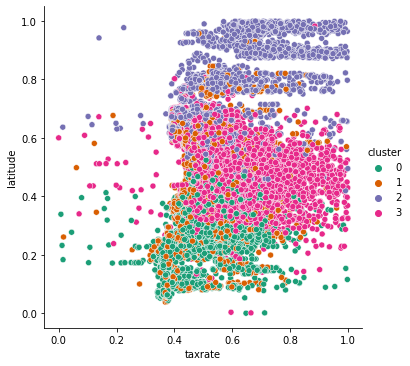

In [28]:
sns.relplot(data=train_scaled, x='taxrate', y='latitude', hue='cluster', palette= 'Dark2')

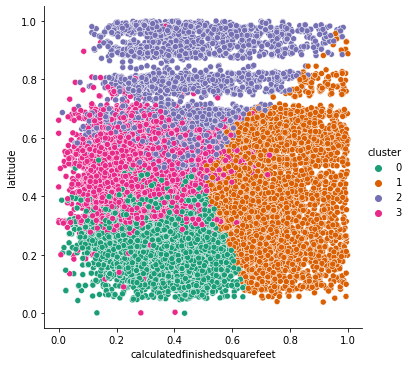

In [29]:
sns.relplot(data=train_scaled, x='calculatedfinishedsquarefeet', y='latitude', hue='cluster', palette= 'Dark2')

(-0.3, 0.3)

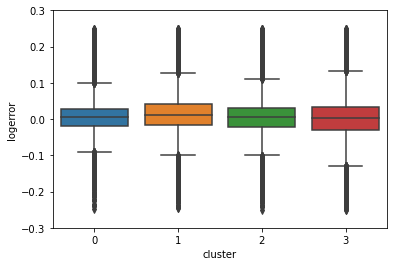

In [30]:
sns.boxplot(y=train.logerror, x=train.cluster)
plt.ylim(-.3, .3)

In [31]:
## save clusters to csv to be explored

In [32]:
model1 = train

In [33]:
model1.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
12802731,2.00,1.00,1.00,3.00,"1,156.00",6037,33.98,-118.06,"5,471.00",0.00,...,0.00,1.26,0.13,0.10,0.20,0.33,1,0,0,3
12430348,7.00,5.00,1.00,2.00,998.00,6037,33.84,-118.11,"5,131.00",0.00,...,0.00,1.25,0.12,0.10,0.10,0.50,1,0,0,3
12861801,2.00,1.00,3.00,4.00,"2,488.00",6037,33.98,-117.95,"21,778.00",0.00,...,0.00,1.27,0.50,0.30,0.50,0.75,1,0,0,1
11730295,1.00,5.00,3.00,6.00,"2,176.00",6037,34.03,-118.30,"7,184.00",0.00,...,0.00,1.23,0.16,0.20,0.50,0.50,1,0,0,3
12962129,2.00,1.00,3.00,3.00,"1,942.00",6037,34.12,-118.00,"8,662.00",0.00,...,0.00,1.17,0.20,0.20,0.40,1.00,1,0,0,3


In [34]:
model1['cluster'] = kmeans.predict(X)

In [35]:
model1.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
12802731,2.00,1.00,1.00,3.00,"1,156.00",6037,33.98,-118.06,"5,471.00",0.00,...,0.00,1.26,0.13,0.10,0.20,0.33,1,0,0,3
12430348,7.00,5.00,1.00,2.00,998.00,6037,33.84,-118.11,"5,131.00",0.00,...,0.00,1.25,0.12,0.10,0.10,0.50,1,0,0,3
12861801,2.00,1.00,3.00,4.00,"2,488.00",6037,33.98,-117.95,"21,778.00",0.00,...,0.00,1.27,0.50,0.30,0.50,0.75,1,0,0,1
11730295,1.00,5.00,3.00,6.00,"2,176.00",6037,34.03,-118.30,"7,184.00",0.00,...,0.00,1.23,0.16,0.20,0.50,0.50,1,0,0,3
12962129,2.00,1.00,3.00,3.00,"1,942.00",6037,34.12,-118.00,"8,662.00",0.00,...,0.00,1.17,0.20,0.20,0.40,1.00,1,0,0,3


In [36]:
model1.groupby('fips').cluster.value_counts()

fips  cluster
6037  3          10486
      2           4803
      1           2752
      0           1419
6059  0           6527
      1           2349
      3           1321
      2              1
6111  2           1943
      1            522
      3            469
Name: cluster, dtype: int64

In [37]:
model1.to_csv('model1.csv')

## LA County

In [38]:
la_train = train[train['la_county'] == 1]

## make a dataframe that is only LA County homes

In [39]:
la_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
12802731,2.00,1.00,1.00,3.00,"1,156.00",6037,33.98,-118.06,"5,471.00",0.00,...,0.00,1.26,0.13,0.10,0.20,0.33,1,0,0,3
12430348,7.00,5.00,1.00,2.00,998.00,6037,33.84,-118.11,"5,131.00",0.00,...,0.00,1.25,0.12,0.10,0.10,0.50,1,0,0,3
12861801,2.00,1.00,3.00,4.00,"2,488.00",6037,33.98,-117.95,"21,778.00",0.00,...,0.00,1.27,0.50,0.30,0.50,0.75,1,0,0,1
11730295,1.00,5.00,3.00,6.00,"2,176.00",6037,34.03,-118.30,"7,184.00",0.00,...,0.00,1.23,0.16,0.20,0.50,0.50,1,0,0,3
12962129,2.00,1.00,3.00,3.00,"1,942.00",6037,34.12,-118.00,"8,662.00",0.00,...,0.00,1.17,0.20,0.20,0.40,1.00,1,0,0,3


In [40]:
la_train.groupby('la_county').la_county.value_counts()

la_county  la_county
1          1            19460
Name: la_county, dtype: int64

In [41]:
la_train.shape

(19460, 31)

In [42]:
la_train = la_train.drop(columns = 'cluster')

In [43]:
la_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
12802731,2.00,1.00,1.00,3.00,"1,156.00",6037,33.98,-118.06,"5,471.00",0.00,...,0.53,0.00,1.26,0.13,0.10,0.20,0.33,1,0,0
12430348,7.00,5.00,1.00,2.00,998.00,6037,33.84,-118.11,"5,131.00",0.00,...,0.53,0.00,1.25,0.12,0.10,0.10,0.50,1,0,0
12861801,2.00,1.00,3.00,4.00,"2,488.00",6037,33.98,-117.95,"21,778.00",0.00,...,0.33,0.00,1.27,0.50,0.30,0.50,0.75,1,0,0
11730295,1.00,5.00,3.00,6.00,"2,176.00",6037,34.03,-118.30,"7,184.00",0.00,...,0.67,0.00,1.23,0.16,0.20,0.50,0.50,1,0,0
12962129,2.00,1.00,3.00,3.00,"1,942.00",6037,34.12,-118.00,"8,662.00",0.00,...,0.53,0.00,1.17,0.20,0.20,0.40,1.00,1,0,0


In [44]:
la_train_scaled = train_scaled[train_scaled['la_county'] == 1]

In [45]:
la_train_scaled.groupby('la_county').la_county.value_counts()

la_county  la_county
1.00       1.00         19460
Name: la_county, dtype: int64

In [46]:
la_train_scaled.shape

(19460, 25)

In [47]:
la_train_scaled = la_train_scaled.drop(columns = 'cluster')

In [48]:
la_train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
0,0.04,0.00,0.00,0.25,0.25,0.46,0.73,0.14,0.00,0.00,...,0.50,0.57,0.07,0.49,0.14,0.25,0.29,1.00,0.00,0.00
1,0.26,0.33,0.00,0.12,0.20,0.36,0.71,0.13,0.00,0.00,...,0.50,0.57,0.08,0.49,0.13,0.25,0.14,1.00,0.00,0.00
2,0.04,0.00,0.31,0.38,0.68,0.46,0.79,0.59,0.00,0.00,...,0.30,0.36,0.10,0.50,0.59,0.75,0.71,1.00,0.00,0.00
3,0.00,0.33,0.31,0.62,0.58,0.50,0.60,0.19,0.00,0.00,...,0.72,0.71,0.11,0.48,0.18,0.50,0.71,1.00,0.00,0.00
4,0.04,0.00,0.31,0.25,0.50,0.57,0.76,0.23,0.00,0.00,...,0.52,0.57,0.13,0.45,0.23,0.50,0.57,1.00,0.00,0.00


### LA Model

In [49]:
## Using the same features from our main model, we will make another model exclusive to homes in LA County

In [50]:
X = la_train_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [51]:
X.head()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
0,0.46,0.25,0.50,0.49
1,0.36,0.20,0.50,0.49
2,0.46,0.68,0.30,0.50
3,0.50,0.58,0.72,0.48
4,0.57,0.50,0.52,0.45


In [52]:
X.corr()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
latitude,1.00,0.21,-0.32,0.32
calculatedfinishedsquarefeet,0.21,1.00,-0.30,-0.05
age_of_home,-0.32,-0.30,1.00,-0.09
taxrate,0.32,-0.05,-0.09,1.00


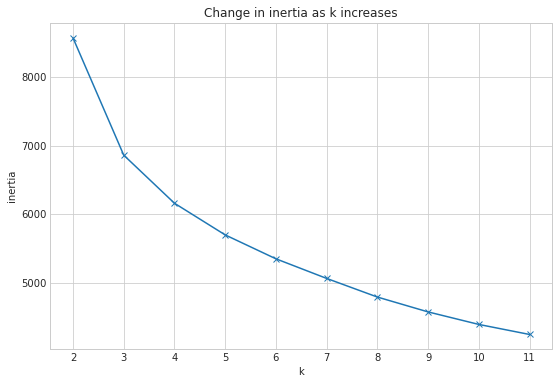

In [53]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(la_train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [54]:
## It appears as though 4 would be the most appropriate k

In [55]:
kmeans = KMeans(n_clusters=4)
## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)
## fit the model to the fields you want to use in your model

kmeans.predict(X)
## make your predictions

la_train_scaled['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

la_train['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

In [56]:
la_train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster
0,0.04,0.00,0.00,0.25,0.25,0.46,0.73,0.14,0.00,0.00,...,0.57,0.07,0.49,0.14,0.25,0.29,1.00,0.00,0.00,0
1,0.26,0.33,0.00,0.12,0.20,0.36,0.71,0.13,0.00,0.00,...,0.57,0.08,0.49,0.13,0.25,0.14,1.00,0.00,0.00,0
2,0.04,0.00,0.31,0.38,0.68,0.46,0.79,0.59,0.00,0.00,...,0.36,0.10,0.50,0.59,0.75,0.71,1.00,0.00,0.00,2
3,0.00,0.33,0.31,0.62,0.58,0.50,0.60,0.19,0.00,0.00,...,0.71,0.11,0.48,0.18,0.50,0.71,1.00,0.00,0.00,2
4,0.04,0.00,0.31,0.25,0.50,0.57,0.76,0.23,0.00,0.00,...,0.57,0.13,0.45,0.23,0.50,0.57,1.00,0.00,0.00,2


In [57]:
la_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
12802731,2.00,1.00,1.00,3.00,"1,156.00",6037,33.98,-118.06,"5,471.00",0.00,...,0.00,1.26,0.13,0.10,0.20,0.33,1,0,0,0
12430348,7.00,5.00,1.00,2.00,998.00,6037,33.84,-118.11,"5,131.00",0.00,...,0.00,1.25,0.12,0.10,0.10,0.50,1,0,0,0
12861801,2.00,1.00,3.00,4.00,"2,488.00",6037,33.98,-117.95,"21,778.00",0.00,...,0.00,1.27,0.50,0.30,0.50,0.75,1,0,0,2
11730295,1.00,5.00,3.00,6.00,"2,176.00",6037,34.03,-118.30,"7,184.00",0.00,...,0.00,1.23,0.16,0.20,0.50,0.50,1,0,0,2
12962129,2.00,1.00,3.00,3.00,"1,942.00",6037,34.12,-118.00,"8,662.00",0.00,...,0.00,1.17,0.20,0.20,0.40,1.00,1,0,0,2


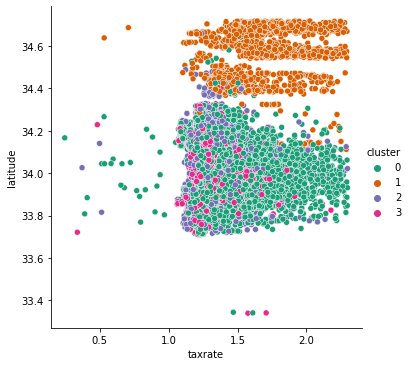

In [58]:
sns.relplot(data=la_train, x='taxrate', y='latitude', hue='cluster', palette= 'Dark2')

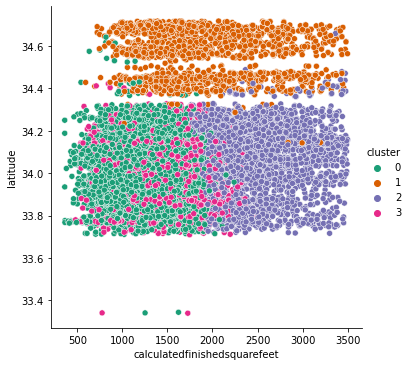

In [59]:
sns.relplot(data=la_train, x='calculatedfinishedsquarefeet', y='latitude', hue='cluster', palette= 'Dark2')

(-0.3, 0.3)

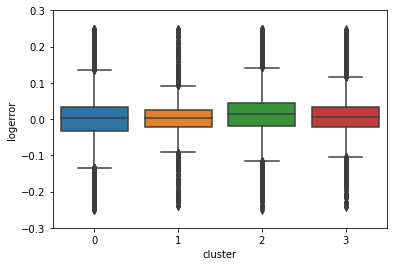

In [60]:
sns.boxplot(y=la_train.logerror, x=la_train.cluster)
plt.ylim(-.3, .3)

In [61]:
la_train.groupby('fips').cluster.value_counts()

fips  cluster
6037  0          9736
      2          3773
      3          3663
      1          2288
Name: cluster, dtype: int64

In [62]:
la_train.to_csv('la_model.csv')

## Orange County

In [63]:
orange_train = train[train['orange_county'] == 1]

## make a dataframe that is only Orange County homes

In [64]:
orange_train.groupby('orange_county').orange_county.value_counts()

orange_county  orange_county
1              1                10198
Name: orange_county, dtype: int64

In [65]:
orange_train = orange_train.drop(columns = 'cluster')

In [66]:
orange_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
14255086,1.00,13.00,2.00,4.00,"1,918.00",6059,33.75,-117.81,"9,900.00",1.00,...,0.40,0.00,1.14,0.23,0.30,0.40,0.50,0,1,0
14458103,1.00,5.00,2.50,3.00,"2,304.00",6059,33.54,-117.64,"4,183.00",0.00,...,0.13,0.00,1.64,0.10,0.00,0.50,0.83,0,1,0
14451214,1.00,5.00,2.00,3.00,"1,626.00",6059,33.42,-117.61,"8,400.00",0.00,...,0.53,0.00,0.95,0.19,0.20,0.40,0.67,0,1,0
14484724,1.00,5.00,3.00,2.00,"1,723.00",6059,33.62,-117.62,"3,150.00",0.00,...,0.20,0.00,1.28,0.07,0.00,0.40,1.50,0,1,0
13869308,1.00,5.00,2.00,3.00,"1,196.00",6059,33.87,-117.97,"6,240.00",0.00,...,0.13,0.00,1.27,0.14,0.10,0.20,0.67,0,1,0


In [67]:
orange_train.shape

(10198, 30)

In [68]:
orange_train_scaled = train_scaled[train_scaled['orange_county'] == 1]

In [69]:
orange_train_scaled.groupby('orange_county').orange_county.value_counts()

orange_county  orange_county
1.00           1.00             10198
Name: orange_county, dtype: int64

In [70]:
orange_train_scaled = orange_train_scaled.drop(columns = 'cluster')

In [71]:
orange_train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
5,0.00,1.00,0.15,0.38,0.50,0.30,0.86,0.26,1.00,0.67,...,0.42,0.43,0.09,0.44,0.27,0.75,0.57,0.00,1.00,0.00
9,0.00,0.33,0.23,0.25,0.62,0.14,0.95,0.10,0.00,0.00,...,0.09,0.14,0.09,0.68,0.11,0.00,0.71,0.00,1.00,0.00
14,0.00,0.33,0.15,0.25,0.40,0.06,0.97,0.22,0.00,0.42,...,0.53,0.57,0.10,0.34,0.22,0.50,0.57,0.00,1.00,0.00
16,0.00,0.33,0.31,0.12,0.43,0.20,0.97,0.07,0.00,0.00,...,0.17,0.21,0.14,0.50,0.07,0.00,0.57,0.00,1.00,0.00
20,0.00,0.33,0.15,0.25,0.27,0.38,0.78,0.16,0.00,0.42,...,0.07,0.14,0.14,0.50,0.16,0.25,0.29,0.00,1.00,0.00


In [72]:
orange_train_scaled.shape

(10198, 24)

### Orange Model

In [73]:
## Using the same features from our main model, we will make another model exclusive to homes in Orange County

In [74]:
X = orange_train_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [75]:
X.head()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
5,0.30,0.50,0.42,0.44
9,0.14,0.62,0.09,0.68
14,0.06,0.40,0.53,0.34
16,0.20,0.43,0.17,0.50
20,0.38,0.27,0.07,0.50


In [76]:
X.corr()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
latitude,1.00,-0.07,0.29,0.25
calculatedfinishedsquarefeet,-0.07,1.00,-0.23,-0.09
age_of_home,0.29,-0.23,1.00,0.05
taxrate,0.25,-0.09,0.05,1.00


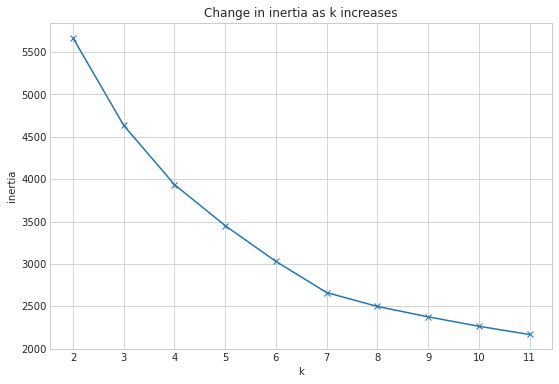

In [77]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(orange_train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [78]:
## It appears as though the most appropriate k would be 4

In [79]:
kmeans = KMeans(n_clusters=4)
## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)
## fit the model to the fields you want to use in your model

kmeans.predict(X)
## make your predictions

orange_train_scaled['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

orange_train['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

In [80]:
orange_train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster
5,0.00,1.00,0.15,0.38,0.50,0.30,0.86,0.26,1.00,0.67,...,0.43,0.09,0.44,0.27,0.75,0.57,0.00,1.00,0.00,2
9,0.00,0.33,0.23,0.25,0.62,0.14,0.95,0.10,0.00,0.00,...,0.14,0.09,0.68,0.11,0.00,0.71,0.00,1.00,0.00,1
14,0.00,0.33,0.15,0.25,0.40,0.06,0.97,0.22,0.00,0.42,...,0.57,0.10,0.34,0.22,0.50,0.57,0.00,1.00,0.00,2
16,0.00,0.33,0.31,0.12,0.43,0.20,0.97,0.07,0.00,0.00,...,0.21,0.14,0.50,0.07,0.00,0.57,0.00,1.00,0.00,1
20,0.00,0.33,0.15,0.25,0.27,0.38,0.78,0.16,0.00,0.42,...,0.14,0.14,0.50,0.16,0.25,0.29,0.00,1.00,0.00,0


In [81]:
orange_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
14255086,1.00,13.00,2.00,4.00,"1,918.00",6059,33.75,-117.81,"9,900.00",1.00,...,0.00,1.14,0.23,0.30,0.40,0.50,0,1,0,2
14458103,1.00,5.00,2.50,3.00,"2,304.00",6059,33.54,-117.64,"4,183.00",0.00,...,0.00,1.64,0.10,0.00,0.50,0.83,0,1,0,1
14451214,1.00,5.00,2.00,3.00,"1,626.00",6059,33.42,-117.61,"8,400.00",0.00,...,0.00,0.95,0.19,0.20,0.40,0.67,0,1,0,2
14484724,1.00,5.00,3.00,2.00,"1,723.00",6059,33.62,-117.62,"3,150.00",0.00,...,0.00,1.28,0.07,0.00,0.40,1.50,0,1,0,1
13869308,1.00,5.00,2.00,3.00,"1,196.00",6059,33.87,-117.97,"6,240.00",0.00,...,0.00,1.27,0.14,0.10,0.20,0.67,0,1,0,0


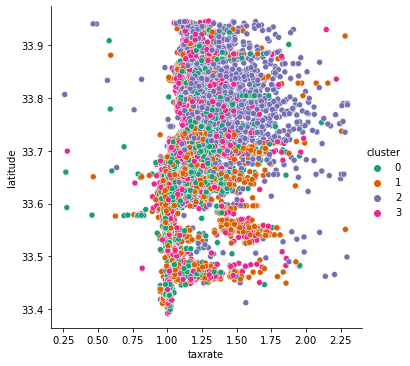

In [82]:
sns.relplot(data=orange_train, x='taxrate', y='latitude', hue='cluster', palette= 'Dark2')

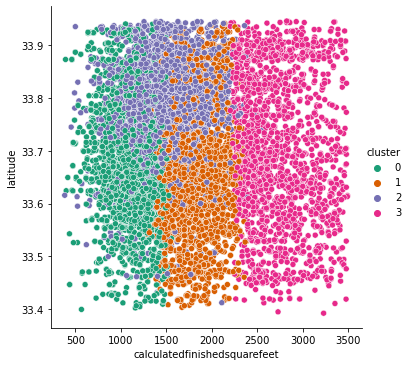

In [83]:
sns.relplot(data=orange_train, x='calculatedfinishedsquarefeet', y='latitude', hue='cluster', palette= 'Dark2')

(-0.3, 0.3)

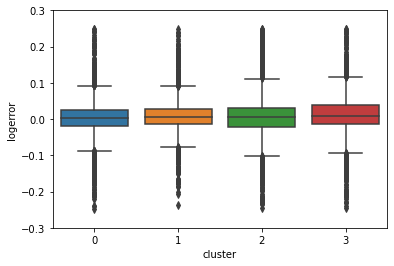

In [84]:
sns.boxplot(y=orange_train.logerror, x=orange_train.cluster)
plt.ylim(-.3, .3)

In [85]:
orange_train.groupby('fips').cluster.value_counts()

fips  cluster
6059  0          2989
      2          2858
      1          2373
      3          1978
Name: cluster, dtype: int64

In [112]:
orange_train.to_csv('orange_model.csv')

## Ventura County

In [87]:
ventura_train = train[train['ventura_county'] == 1]

## make a dataframe that is only Ventura County homes

In [88]:
ventura_train.groupby('ventura_county').ventura_county.value_counts()

ventura_county  ventura_county
1               1                 2934
Name: ventura_county, dtype: int64

In [89]:
ventura_train = ventura_train.drop(columns = 'cluster')

In [90]:
ventura_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
17221898,1.00,5.00,3.00,4.00,"2,288.00",6111,34.24,-118.82,"15,006.00",0.00,...,0.27,0.00,1.13,0.34,0.30,0.50,0.75,0,0,1
17127435,1.00,5.00,2.00,3.00,"2,431.00",6111,34.23,-119.07,"13,643.00",1.00,...,0.40,0.00,1.07,0.31,0.30,0.50,0.67,0,0,1
17214217,1.00,5.00,1.00,2.00,882.00,6111,34.19,-118.91,"6,866.00",0.00,...,0.33,0.00,1.09,0.16,0.20,0.10,0.50,0,0,1
17098734,1.00,5.00,2.00,3.00,"1,154.00",6111,34.37,-119.06,"9,270.00",0.00,...,0.73,0.00,1.35,0.21,0.30,0.20,0.67,0,0,1
17198684,1.00,5.00,2.00,4.00,"2,242.00",6111,34.27,-118.88,"6,900.00",0.00,...,0.27,0.00,1.14,0.16,0.20,0.50,0.50,0,0,1


In [91]:
ventura_train.shape

(2934, 30)

In [92]:
ventura_train_scaled = train_scaled[train_scaled['ventura_county'] == 1]

In [93]:
ventura_train_scaled.groupby('ventura_county').ventura_county.value_counts()

ventura_county  ventura_county
1.00            1.00              2934
Name: ventura_county, dtype: int64

In [94]:
ventura_train_scaled = ventura_train_scaled.drop(columns = 'cluster')

In [95]:
ventura_train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
7,0.00,0.33,0.31,0.38,0.61,0.66,0.33,0.40,0.00,0.67,...,0.22,0.29,0.11,0.43,0.40,0.75,0.71,0.00,0.00,1.00
8,0.00,0.33,0.15,0.25,0.66,0.65,0.20,0.36,1.00,0.50,...,0.40,0.43,0.07,0.40,0.36,0.75,0.71,0.00,0.00,1.00
28,0.00,0.33,0.00,0.12,0.17,0.61,0.28,0.18,0.00,0.33,...,0.34,0.36,0.09,0.41,0.18,0.50,0.14,0.00,0.00,1.00
36,0.00,0.33,0.15,0.25,0.25,0.74,0.21,0.24,0.00,0.50,...,0.73,0.79,0.14,0.54,0.24,0.75,0.29,0.00,0.00,1.00
37,0.00,0.33,0.15,0.38,0.60,0.67,0.30,0.18,0.00,0.67,...,0.24,0.29,0.07,0.43,0.18,0.50,0.71,0.00,0.00,1.00


In [96]:
ventura_train_scaled.shape

(2934, 24)

### Ventura Model

In [97]:
## Using the same features from our main model, we will make another model exclusive to homes in Ventura County

In [98]:
X = ventura_train_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [99]:
X.head()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
7,0.66,0.61,0.22,0.43
8,0.65,0.66,0.40,0.40
28,0.61,0.17,0.34,0.41
36,0.74,0.25,0.73,0.54
37,0.67,0.60,0.24,0.43


In [100]:
X.corr()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
latitude,1.00,-0.09,0.15,0.10
calculatedfinishedsquarefeet,-0.09,1.00,-0.35,-0.01
age_of_home,0.15,-0.35,1.00,-0.08
taxrate,0.10,-0.01,-0.08,1.00


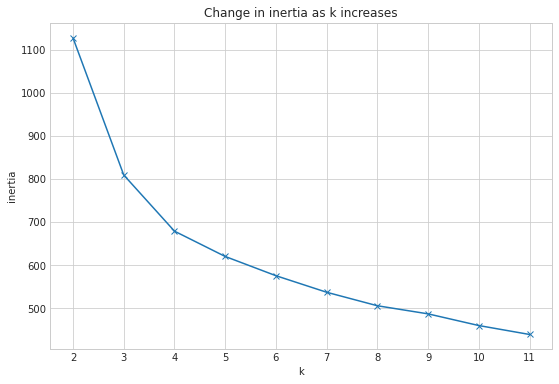

In [101]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(ventura_train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [102]:
## It appears that 4 would be an appropriate value for k

In [103]:
kmeans = KMeans(n_clusters=4)
## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)
## fit the model to the fields you want to use in your model

kmeans.predict(X)
## make your predictions

ventura_train_scaled['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

ventura_train['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

In [104]:
ventura_train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster
7,0.00,0.33,0.31,0.38,0.61,0.66,0.33,0.40,0.00,0.67,...,0.29,0.11,0.43,0.40,0.75,0.71,0.00,0.00,1.00,1
8,0.00,0.33,0.15,0.25,0.66,0.65,0.20,0.36,1.00,0.50,...,0.43,0.07,0.40,0.36,0.75,0.71,0.00,0.00,1.00,1
28,0.00,0.33,0.00,0.12,0.17,0.61,0.28,0.18,0.00,0.33,...,0.36,0.09,0.41,0.18,0.50,0.14,0.00,0.00,1.00,3
36,0.00,0.33,0.15,0.25,0.25,0.74,0.21,0.24,0.00,0.50,...,0.79,0.14,0.54,0.24,0.75,0.29,0.00,0.00,1.00,0
37,0.00,0.33,0.15,0.38,0.60,0.67,0.30,0.18,0.00,0.67,...,0.29,0.07,0.43,0.18,0.50,0.71,0.00,0.00,1.00,1


In [105]:
ventura_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
17221898,1.00,5.00,3.00,4.00,"2,288.00",6111,34.24,-118.82,"15,006.00",0.00,...,0.00,1.13,0.34,0.30,0.50,0.75,0,0,1,1
17127435,1.00,5.00,2.00,3.00,"2,431.00",6111,34.23,-119.07,"13,643.00",1.00,...,0.00,1.07,0.31,0.30,0.50,0.67,0,0,1,1
17214217,1.00,5.00,1.00,2.00,882.00,6111,34.19,-118.91,"6,866.00",0.00,...,0.00,1.09,0.16,0.20,0.10,0.50,0,0,1,3
17098734,1.00,5.00,2.00,3.00,"1,154.00",6111,34.37,-119.06,"9,270.00",0.00,...,0.00,1.35,0.21,0.30,0.20,0.67,0,0,1,0
17198684,1.00,5.00,2.00,4.00,"2,242.00",6111,34.27,-118.88,"6,900.00",0.00,...,0.00,1.14,0.16,0.20,0.50,0.50,0,0,1,1


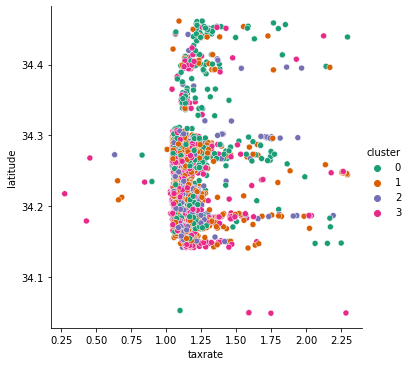

In [106]:
sns.relplot(data=ventura_train, x='taxrate', y='latitude', hue='cluster', palette= 'Dark2')

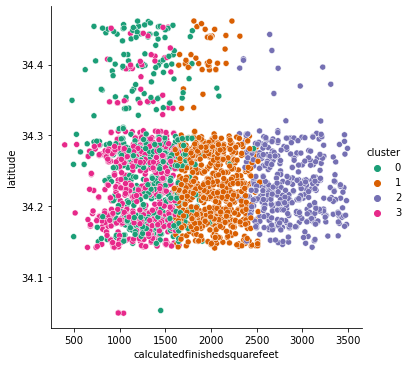

In [107]:
sns.relplot(data=ventura_train, x='calculatedfinishedsquarefeet', y='latitude', hue='cluster', palette= 'Dark2')

(-0.3, 0.3)

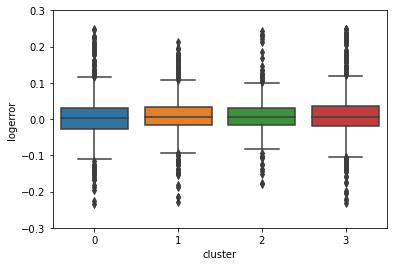

In [108]:
sns.boxplot(y=ventura_train.logerror, x=ventura_train.cluster)
plt.ylim(-.3, .3)

In [109]:
ventura_train.groupby('fips').cluster.value_counts()

fips  cluster
6111  1          895
      3          876
      0          725
      2          438
Name: cluster, dtype: int64

In [111]:
ventura_train.to_csv('ventura_model.csv')